In [2]:
%reload_ext autoreload
%autoreload 2

function.__name__='matrix_multiplication'


100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.32it/s]


Sizes defined for each test (no unit): [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
Time taken for each test (in seconds): [0.01920581 0.07691813 0.17206597 0.30396628 0.47884893 0.69019604
 0.93736601 1.23035407 1.54887009 1.91492605]
Memory used for each test (in bytes): [ 16384.  32768. 114688. 180224. 212992. 245760. 278528. 311296. 360448.
 409600.]
function.__name__='custom_sort'


100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.31it/s]

Sizes defined for each test (no unit): [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
Time taken for each test (in seconds): [0.01922989 0.07695222 0.17162132 0.30378294 0.47783184 0.68918085
 0.94063282 1.22484088 1.55198288 1.91407585]
Memory used for each test (in bytes): [ 32768.  98304. 163840. 229376. 262144. 294912. 327680. 376832. 409600.
 442368.]


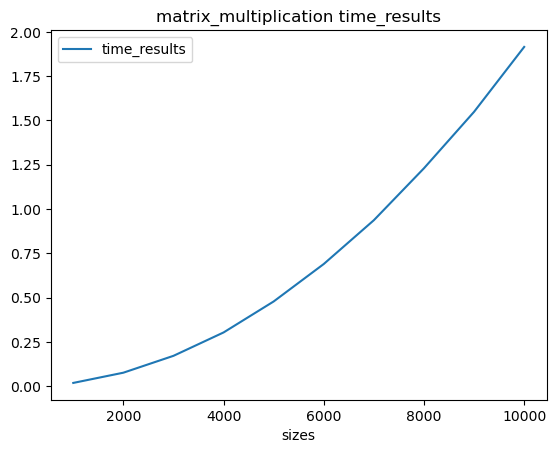

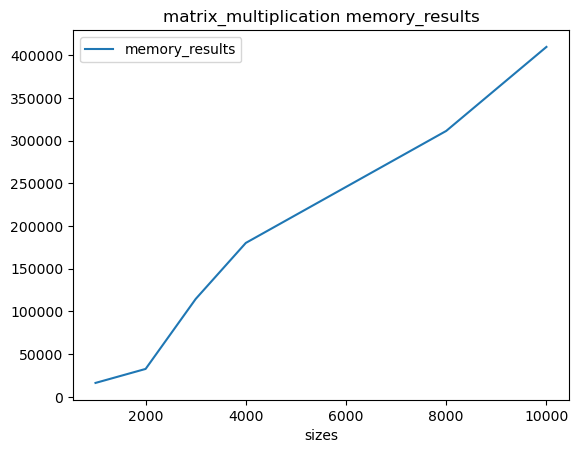

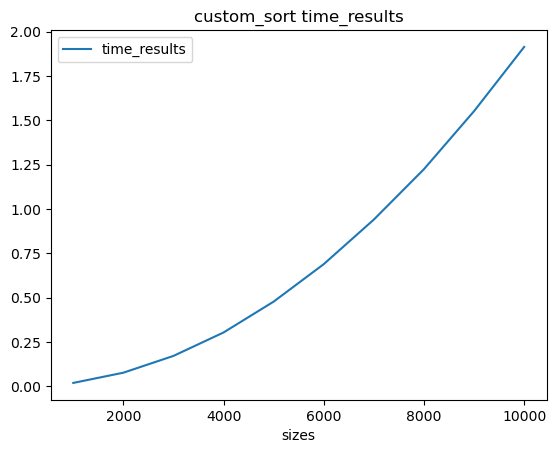

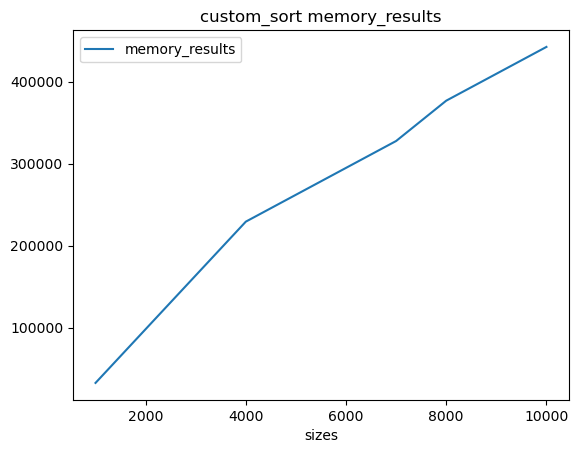

In [2]:
import pandas as pd

from stage_2 import test_time_and_memory_complexity, matrix_multiplication, custom_sort 

for function in [matrix_multiplication, custom_sort]:
    print(f"{function.__name__=}")
    time_results, memory_results, sizes = test_time_and_memory_complexity(
        function=custom_sort,
        tests_number=10,
        scale=1000
    )
    print("Sizes defined for each test (no unit):", sizes)
    print("Time taken for each test (in seconds):", time_results)
    print("Memory used for each test (in bytes):", memory_results)
    df = pd.DataFrame({
        'time_results': time_results, 
        'memory_results': memory_results,
        'sizes': sizes, 
    })

    df.plot(title=f"{function.__name__} time_results", x='sizes', y='time_results', ax=None)
    df.plot(title=f"{function.__name__} memory_results", x='sizes', y='memory_results', ax=None)

In both `matrix_multiplication` and `custom_sort` function there is some kind of polynomiarl (2nd degree) relation between size and time of computation, and rather linear relation between size and memory usage. 

# Compare python find and custom find

In [4]:
from stage_2 import custom_find, python_find 

time_results_custom, memory_results_custom, sizes = test_time_and_memory_complexity(
    function=custom_find,
    tests_number=10,
    scale=100000
)


time_results_python, memory_results_python, sizes = test_time_and_memory_complexity(
    function=python_find,
    tests_number=10,
    scale=100000
)


df = pd.DataFrame({
    'time_results_custom': time_results_custom, 
    'memory_results_custom': memory_results_custom,
    'time_results_python': time_results_python, 
    'memory_results_python': memory_results_python,
    'sizes': sizes,
})

100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.53s/it]


<Axes: xlabel='sizes'>

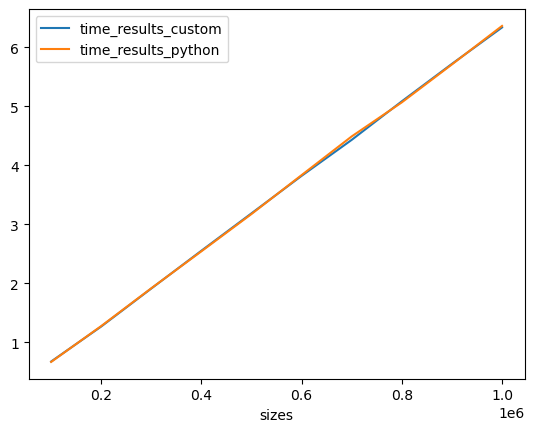

In [10]:
df.plot(x='sizes', y=['time_results_custom', 'time_results_python'])

Time complexity is very similar, the differences are so small that can be ignored, at least in this 

<Axes: xlabel='sizes'>

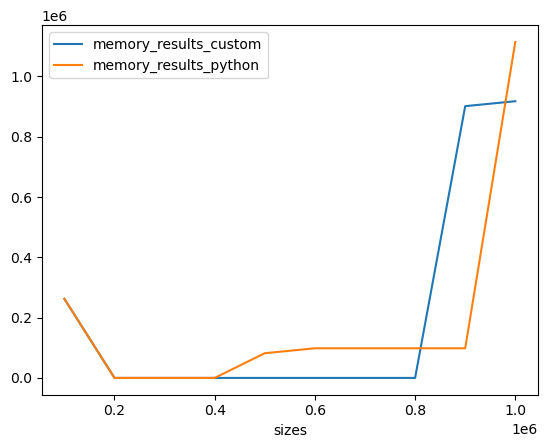

In [13]:
df.plot(x='sizes', y=['memory_results_custom', 'memory_results_python'])

The behaviour of these curves is quite unexpected, probablu due to the small size of data, or python internal memory management methods. One thing that ensure us is the increment of memeory usage with higher sizes of input data. Besides this strange behaviour memory usage is quite similar in python and custom implementation of `find` method.